C:\Users\moham\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Survival,sex
PassengerId,,,,,,,,,
1,0,3,1,22,1,0,C23,No,male
2,1,1,0,38,1,0,C27,Yes,female
3,1,3,0,26,0,0,C27,Yes,female
4,1,1,0,35,1,0,B96,Yes,female
5,0,3,1,35,0,0,C23,No,male
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27,0,0,C23,No,male
888,1,1,0,19,0,0,C25,Yes,female
889,0,3,0,29,1,2,B96,No,female


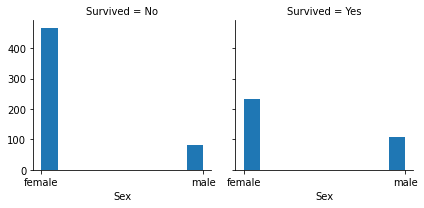

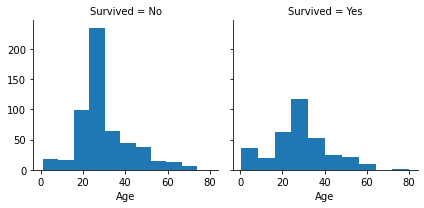

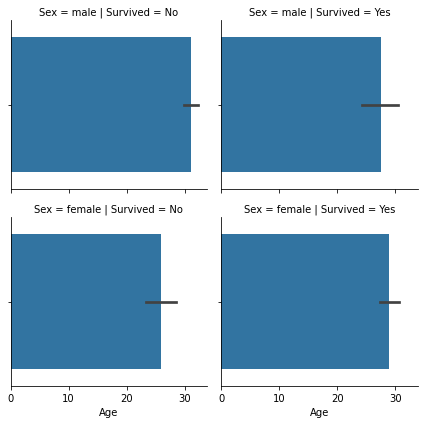

In [105]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
a=pd.read_csv('titanic-passengers.csv',sep=';')
a['Cabin'].str.encode('utf-8')
a["Age"].fillna(int(a["Age"].mean()),inplace=True)
a['Cabin'] = a['Cabin'].apply(lambda v: np.random.choice(["C23","C25","C27","B96","B98"]))
a['Embarked'] = a['Embarked'].apply(lambda p: np.random.choice(["S","C","Q"]))
a=a.set_index(["PassengerId"])
a=a.sort_index()
c=sns.FacetGrid(a,col="Survived")
c.map(plt.hist,"Sex")
d=sns.FacetGrid(a,col="Survived")
d.map(plt.hist,"Age")
b=sns.FacetGrid(a,row="Sex",col="Survived")
b.map(sns.barplot,"Age")
a['Age']=a['Age'].astype(int)
Survival={"Survived":{"Yes":1, "No": 0}} 
a['Survival']=a["Survived"]
a.replace(Survival, inplace=True)
def fastfunction(x):
    n=(a[[x,"Survival"]].groupby([x], as_index=True).mean())
    n=n.astype(int)
    return(n)
del(a['Name'])
del(a['Ticket'])
del(a['Fare'])
del(a['Embarked'])
sex={"Sex":{"male":1, "female": 0}} 
a['sex']=a["Sex"]
a.replace(sex, inplace=True)
a


Accuracy=0.81


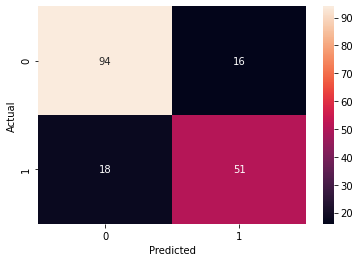

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
a['Age']=a['Age'].astype(np.float64)
x=a[['Age','Pclass',"Sex"]]
y=a['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
fpr,tpr,threshold=sklearn.metrics.roc_curve(y_test,y_pred)


0.7968379446640316


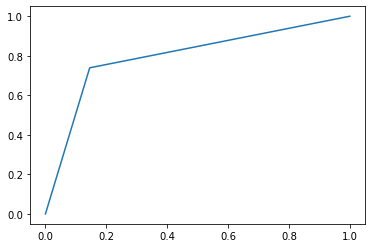

In [108]:
plt.plot(fpr,tpr)
auc = sklearn.metrics.auc(fpr,tpr)
print(auc)